## This is code developped for a written assignment:

### - it implements a 'hidden Markov chain model' for atmospheric pressure data, where the aim is to identify different states throughout the time-span of the data
### - additionlly, the model can predict probabilities for regime changes in the atmospheric pressure configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

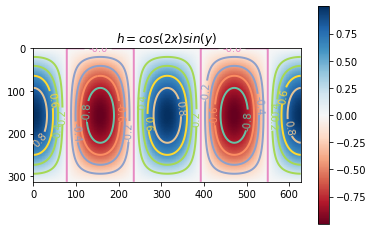

In [14]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# the function that I'm going to plot
def z_func(x,y):
    return np.cos(2*x)*np.sin(y)
 
#x = arange(-3.0,3.0,0.1)
x = arange(0,2*3.14,0.01)
#y = arange(-3.0,3.0,0.1)
y = arange(0,3.14,0.01)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

#fig, ax = plt.subplots(figsize=(6,6))

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$h=cos(2x)sin(y)$')
show()

In [119]:
m = np.matrix([[0.96,0,0.04,0],
              [0.13,0.69,0,0.18],
              [0,0.01,0.93,0.06],
              [0.02,0,0.02,0.96]])
print(m)
print("------------------------------------------")
#mT = np.matrix.transpose(m)
#print(mT)
print("------------------------------------------")
#print(m*mT)
print("------------------------------------------")
#eigenvalues = np.linalg.eigvals(m)
#print(eigenvalues)
print("------------------------------------------")
eigenvalues, eigenvectors = np.linalg.eig(m)
print(eigenvalues)
#print(eigenvectors)
print("------------------------------------------")
#reshaped = np.reshape(m,(16,1))
#print(reshaped)

[[0.96 0.   0.04 0.  ]
 [0.13 0.69 0.   0.18]
 [0.   0.01 0.93 0.06]
 [0.02 0.   0.02 0.96]]
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
[0.69130942+0.j         1.        +0.j         0.92434529+0.00828087j
 0.92434529-0.00828087j]
------------------------------------------


### We import data of atmospheric pressure levels from NOAA

In [ ]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

# Set the URL you want to webscrape from
url = 'https://psl.noaa.gov/cgi-bin/db_search/DBListFiles.pl?did=195&tid=87671&vid=663'

# Connect to the URL
response = requests.get(url)

# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.text, "html.parser")

# To download the whole data set, let's do a for loop through all a tags
line_count = 1 #variable to track what line you are on
for one_a_tag in soup.findAll('a'):  #'a' tags are for links
    if line_count >= 69: #code for text files starts at line 36
        link = one_a_tag['href']
        download_url = link
        urllib.request.urlretrieve(download_url,'./'+link[link.find('/hgt.')+1:]) 
        time.sleep(1) #pause the code for a sec
    #add 1 for next line
    line_count +=1

In [2]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [3]:
import numpy as np
import xarray as xr
import datetime as dt
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [4]:
import numpy as np
#from scipy.io import netcdf
import netCDF4 # import module
from netCDF4 import Dataset
import matplotlib as m
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
from numpy import meshgrid
from mpl_toolkits.basemap import Basemap
#import plotly
#import plotly.plotly as py
#from plotly.graph_objs import *
import matplotlib.animation as animation
import datetime

### Loading the downloaded data

In [4]:
ds = xr.open_dataset('hgt.1948.nc')
lat = xr.open_dataset('hgt.1948.nc').lat
lon = xr.open_dataset('hgt.1948.nc').lon
time = xr.open_dataset('hgt.1948.nc').time
level = xr.open_dataset('hgt.1948.nc').level
dataset = xr.open_dataset('hgt.1948.nc').hgt

(366, 17, 73, 144)
(366, 73, 144)


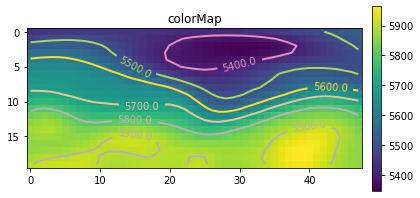

In [25]:
"""Example plot """
print(dataset.shape)
#print(len(time))
H1 = dataset[210,5,4:24, 48:96]
#H1 = dataset[200,5,0:36,48:96]
H2 = dataset[350,5,:,:]
timestack = dataset[:,5,:,:]
print(timestack.shape)


fig = plt.figure(figsize=(6, 3.2))

ax1 = fig.add_subplot(111)
ax1.set_title('colorMap')
im = imshow(H1)
cset = contour(H1,arange(5000,6000,100),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
ax1.set_aspect('equal')

#ax2 = fig.add_subplot(121)
#ax2.set_title('colorMap2')
#plt.imshow(H2)
#ax2.set_aspect('equal')
cax = fig.add_axes([0.26, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(im, orientation='vertical')
plt.show()

Text(0.5, 1.0, '500 hPa Geopotential Height')

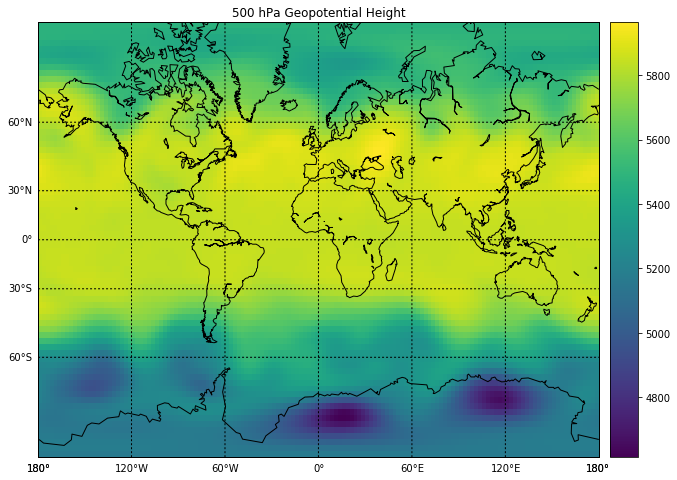

In [6]:
# Using basemap to plot the geographical landscape above the pressure map
#https://rabernat.github.io/research_computing/intro-to-basemap.html
level = 5
time = 184



fig = plt.figure(num=None, figsize=(12, 8) )

d = Dataset("hgt.1948.nc")
hgt = d.variables["hgt"][:][time, level, :, :]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][:]
lat = d.variables["lat"][:]
#x, y = m(*np.meshgrid(lon,lat))

#m.pcolormesh(x,y,hgt,shading='flat',cmap=plt.cm.jet)
#m.colorbar(location='right')


m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
im = m.imshow(hgt)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")

m.drawcoastlines()
#m.fillcontinents()
#goes above as argument #color='tan',lake_color='lightblue'
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,90.,30.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
#goes above as argument #fill_color='lightblue'
plt.title("500 hPa Geopotential Height")

### The 500 hPa data is plotted for the whole world and for the ROI (Europe)

<Figure size 864x576 with 0 Axes>

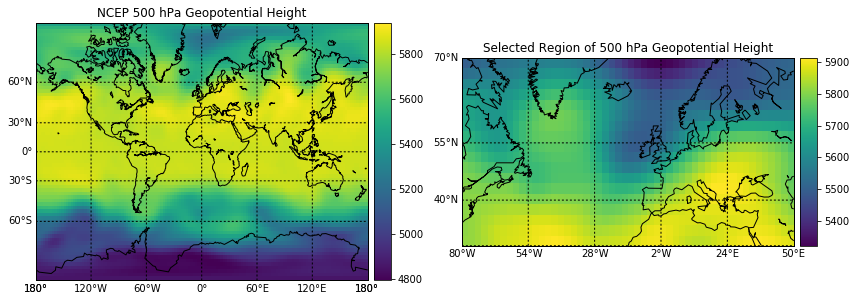

In [424]:
#https://rabernat.github.io/research_computing/intro-to-basemap.html
level = 5
time = 184



fig = plt.figure(num=None, figsize=(12, 8) )

d = Dataset("hgt.1948.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
#x, y = m(*np.meshgrid(lon,lat))
#m.pcolormesh(x,y,hgt,shading='flat',cmap=plt.cm.jet)
#m.colorbar(location='right')

plt.figure(figsize=(14,6))
plt.subplot(122)
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto')

#im = imshow(hgt)
#x = np.linspace(48, 96, hgt.shape[1])
#y = np.linspace(4, 24, hgt.shape[0])

#xx, yy = meshgrid(x, y)

#cset = contour(xx, yy, hgt,arange(5000,6000,100),linewidths=2,cmap=cm.Set2)
#clabel(cset,inline=True,fmt='%1.1f',fontsize=10)

#x, y = m(*np.meshgrid(lon,lat))
#cset = m.contour(x,y,hgt,range(5300,6000,100),linewidths=2,cmap=cm.Set2)
#plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")

m.drawcoastlines()
#m.fillcontinents()
#goes above as argument #color='tan',lake_color='lightblue'
# draw parallels and meridians.
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
#goes above as argument #fill_color='lightblue'
plt.title("Selected Region of 500 hPa Geopotential Height")

plt.subplot(121)
d = Dataset("hgt.1948.nc")
hgt = d.variables["hgt"][:][time, level, :, :]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][:]
lat = d.variables["lat"][:]
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
im = m.imshow(hgt)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")

m.drawcoastlines()
#m.fillcontinents()
#goes above as argument #color='tan',lake_color='lightblue'
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,90.,30.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
#goes above as argument #fill_color='lightblue'
plt.title("NCEP 500 hPa Geopotential Height")


plt.savefig("1July1948_Europe.pdf",bbox_inches="tight",pad_inches=0.05)
plt.show()

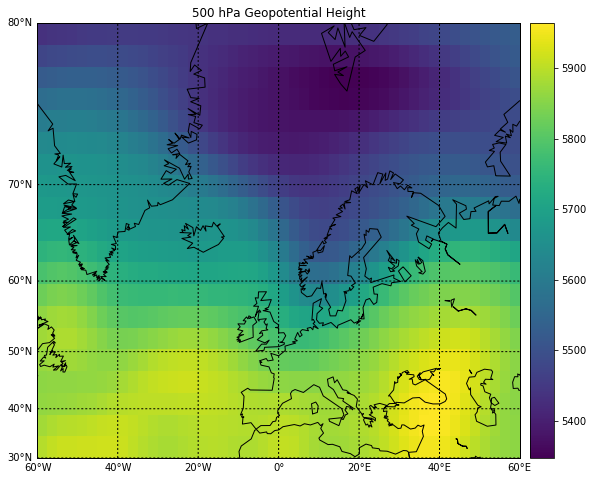

In [43]:
#https://rabernat.github.io/research_computing/intro-to-basemap.html
level = 5
time = 210



fig = plt.figure(num=None, figsize=(12, 8) )

d = Dataset("hgt.1948.nc")
hgt = d.variables["hgt"][:][time, level, 4:24, 48:96]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][48:96]
lat = d.variables["lat"][4:24]
#x, y = m(*np.meshgrid(lon,lat))
#m.pcolormesh(x,y,hgt,shading='flat',cmap=plt.cm.jet)
#m.colorbar(location='right')


m = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=80,llcrnrlon=-60,urcrnrlon=60,resolution='c')
im = m.imshow(hgt)
#im = imshow(hgt)
#x = np.linspace(48, 96, hgt.shape[1])
#y = np.linspace(4, 24, hgt.shape[0])

#xx, yy = meshgrid(x, y)

#cset = contour(xx, yy, hgt,arange(5000,6000,100),linewidths=2,cmap=cm.Set2)
#clabel(cset,inline=True,fmt='%1.1f',fontsize=10)

#x, y = m(*np.meshgrid(lon,lat))
#cset = m.contour(x,y,hgt,range(5300,6000,100),linewidths=2,cmap=cm.Set2)
#plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")

m.drawcoastlines()
#m.fillcontinents()
#goes above as argument #color='tan',lake_color='lightblue'
# draw parallels and meridians.
m.drawparallels(np.arange(30.,81.,10.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-60.,61.,20.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
#goes above as argument #fill_color='lightblue'
plt.title("500 hPa Geopotential Height")
plt.show()

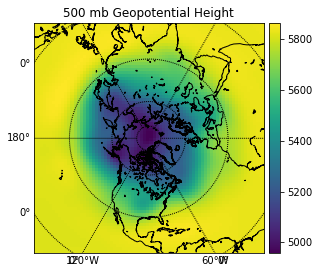

In [71]:
#https://gist.github.com/brews/3987622
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import datetime

datetime_origin = datetime.datetime(1, 1, 1, 0, 0, 0, 0)
# In this case, this is 500 mb. Can check below with d.variables["level"][:]
level = 5
time = 0
# 277830 is because this is a ~2.5 x 2.5 degree grid; 111132 meters are in about 111 km appart. This is fairly rough.
meters_per_grid = 277830

# Download the dataset from: ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.mean.nc
d = Dataset("hgt.1948.nc")
hgt = d.variables["hgt"][:][time, level, :, :]  # Not sure about the dims, here.
lon = d.variables["lon"][:]
# need to reverse direction of lat dimension so it's increasing.
lat = d.variables["lat"][:][::-1]
hgt = hgt[::-1, :]
hgt, lon = shiftgrid(180, hgt, lon, start = False)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Lambert Azimuthal Equal Area
# Larger area:
#m = Basemap(width = 12000000, height = 12000000, resolution = "l", projection = "laea", lat_ts = 50, lat_0 = 50, lon_0 = -107.0)
# Smaller area:
#m = Basemap(width = 12000000, height = 8000000, resolution = "l", projection = "laea", lat_ts = 50, lat_0 = 50, lon_0 = -107.0)
# For north Polar Stereographic projection
#npstere
m = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='l')
nx = int((m.xmax - m.xmin)/meters_per_grid); ny = int((m.ymax - m.ymin)/meters_per_grid)
hgt = m.transform_scalar(hgt, lon, lat, nx, ny)
im = m.imshow(hgt, interpolation = "none")

m.drawcoastlines()
parallels = np.arange(-90, 90, 30)
meridians = np.arange(-180, 180, 60)
m.drawparallels(parallels, labels = [1, 0, 0, 1])
m.drawmeridians(meridians, labels = [1, 0, 0, 1])

cb = m.colorbar(im, "right", size = "5%", pad = "2%")
ax.set_title("500 mb Geopotential Height")
plt.show()

## Std Europe Data Matrix is pre-processed by applying PCA analysis and projection 

In [55]:
dataset = xr.open_dataset("hgt.1996.nc").hgt
timeframe = dataset[0,5,8:26, 40:92]
print(timeframe.shape)

(18, 52)


### join the temporal data, where each time point contains information in form of a matrix, that is raveled beforehand

In [57]:
dataset = xr.open_dataset("hgt.1996.nc").hgt
timeframe = dataset[0,5,8:26, 40:92]
datamatrix = np.reshape(timeframe, (1, 936))
time = xr.open_dataset("hgt.1996.nc").time
for l in range(1,len(time)):
    timeframe = dataset[l,5,8:26, 40:92]
    #print(timeframe.shape)
    onedim = np.reshape(timeframe, (1, 936))
    datamatrix = np.vstack((datamatrix,onedim))

In [58]:
for j in range(1,14):
    dataset = xr.open_dataset("hgt."+str(1996+j)+".nc").hgt
    time_neu = xr.open_dataset("hgt."+str(1996+j)+".nc").time
    for i in range(len(time_neu)):
        timeframe = dataset[i,5,8:26, 40:92]
        #print(timeframe.shape)
        onedim = np.reshape(timeframe, (1, 936))
        datamatrix = np.vstack((datamatrix,onedim))
        #print(onedim)

In [60]:
print(datamatrix.shape)
np.savetxt('std_datamatrix_europe.txt', datamatrix, delimiter = ',')

(5114, 936)


In [5]:
data_eu = np.loadtxt(open("std_datamatrix_europe.txt","rb"),delimiter=",",skiprows=0)
print(data_eu.shape)

(5114, 936)


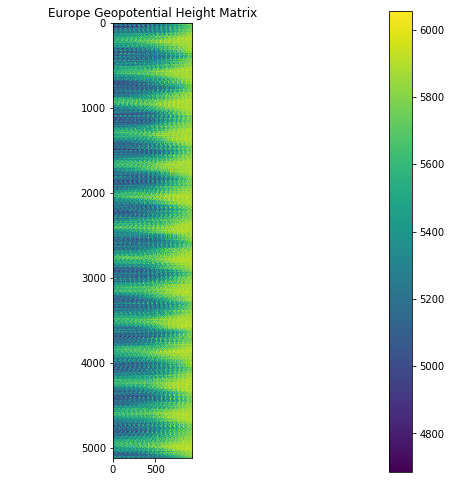

In [6]:
# showing a plot of time-stacked data 
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)
ax1.set_title('Europe Geopotential Height Matrix')
plt.imshow(data_eu[:,:])
ax1.set_aspect('equal')

cax = fig.add_axes([0.26, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

[[4974. 4962. 4951. ... 5886. 5900. 5906.]
 [5061. 5061. 5057. ... 5860. 5866. 5864.]
 [5019. 5020. 5017. ... 5825. 5825. 5824.]
 ...
 [5297. 5292. 5286. ... 5793. 5786. 5775.]
 [5263. 5269. 5276. ... 5821. 5825. 5826.]
 [5307. 5301. 5290. ... 5831. 5839. 5846.]]
(5114, 936)
5061.0


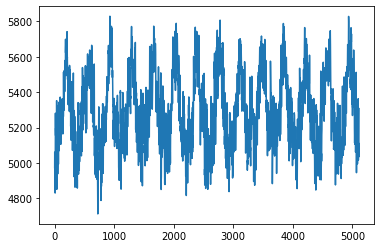

In [7]:
#showing temporal fluctuations of the height, at which 500hPa is found
print(data_eu)
print(data_eu.shape)
print(data_eu[1,0])
plt.plot(data_eu[:,0])
plt.show()

## The following part compares different approaches on running-time averages for the data
### -> the results can be seen by a plot, where the average is plotted on top of the real fluctuating data

In [9]:
K=14
N=5114/14
run_an_mean = np.zeros((5114,936))
for i in range(936):
    for t in range(int(N/2 +1),int(N*K-N/2),1):
        run_an_mean[t,i]=1/(int(N)+1)*data_eu[int(t-N/2):int(t+N/2),i].sum()
    for t_begin in range(0,int(N/2+1),1):
        run_an_mean[t_begin,i]=1/(int(N)+1)*data_eu[0:int(N-1),i].sum()
    
    for t_end in range(int(N*K-N/2),int(K*N),1):
        run_an_mean[t_end,i]=1/(int(N)+1)*data_eu[int(K*N-N):int(K*N-1),i].sum()

In [234]:
x_dat = data_eu[int(200-(N/2)):int(200+(N/2)),0]
print(len(x_dat))
print(int(N/2 +1),int(N*K-N/2))
print(int(200-(N/2)),int(200+(N/2)))
print(5114/14)

365
183 4931
17 382
365.2857142857143


In [10]:
##nach altem paper; überarbeitet nach eigenen überlegungen 
M=5114/(14*12)
run_mon_mean_alt = np.zeros((5114,936))
for i in range(936):
    for t in range(int(M/2 +1),int(N*K-M/2),1):
        run_mon_mean_alt[t,i]=1/(int(M)+1)*(data_eu[int(t-M/2):int(t+M/2-1),i]-run_an_mean[int(t-M/2):int(t+M/2-1),i]).sum()
    
    for t_begin in range(0,int(M/2+1),1):
        run_mon_mean_alt[t_begin,i]=data_eu[int(M/2+1),i]-run_an_mean[int(M/2+1),i]
    
    for t_end in range(int(N*K-M/2),int(K*N),1):
        run_mon_mean_alt[t_end,i]=data_eu[int(N*K-M/2-1),i]-run_an_mean[int(N*K-M/2-1),i]

In [215]:
##nach altem paper
M=5114/(14*12)
run_mon_mean_alt = np.zeros((5114,936))
for i in range(936):
    for t in range(int(M/2 +1),int(N*K-M/2),1):
        run_mon_mean_alt[t,i]=1/(int(M)+1)*(data_eu[int(t-M/2):int(K*N-M/2-1),i]-run_an_mean[int(t-M/2):int(K*N-M/2-1),i]).sum()
    
    for t_begin in range(0,int(M/2+1),1):
        run_mon_mean_alt[t_begin,i]=data_eu[int(M/2+1),i]
    
    for t_end in range(int(N*K-M/2),int(K*N),1):
        run_mon_mean_alt[t_end,i]=data_eu[int(N*K-M/2-1),i]

In [247]:
print(1/31 *(data_eu[int(K*N-M-110):int(K*N-M/2),0]-run_an_mean[int(K*N-M-110):int(K*N-M/2),0]).sum())
print(data_eu[150,0]-run_an_mean[150,0])
a = np.array((2,1,3,4,5,19))
b = np.array((4,4,4,4,4,4))
print((a[:]-b[:]).sum())

156.81253305129567
254.15846994535514
10


In [165]:
##nach neurem paper
M=5114/(14*12)
run_mon_mean = np.zeros((5114,936))
for i in range(936):
    for t in range(int(M/2 +1),int(N*K-M/2),1):
        run_mon_mean[t,i]=1/(int(M)+1)*(data_eu[int(t-M/2):int(K*N-M/2-1),i]-run_an_mean[int(t-M/2):int(K*N-M/2-1),i]).sum()
    
    for t_begin in range(0,int(M/2+1),1):
        run_mon_mean[t_begin,i]=run_an_mean[int(M/2+1),i]
    
    for t_end in range(int(N*K-M/2),int(K*N),1):
        run_mon_mean[t_end,i]=run_an_mean[int(N*K-M/2-1),i]

In [11]:
mean_an_cycle = np.zeros((int(N),936))
liste = np.array((0,1,2,3,4,5,6,7,8,9,10,11,12,13))
liste = liste * int(5114/14)
for i in range(936):
    for tau in range(1,int(N)+1,1):
        mean_an_cycle[int(tau-1),i]=1/14 * run_mon_mean_alt[liste[0:14]+tau,i].sum()

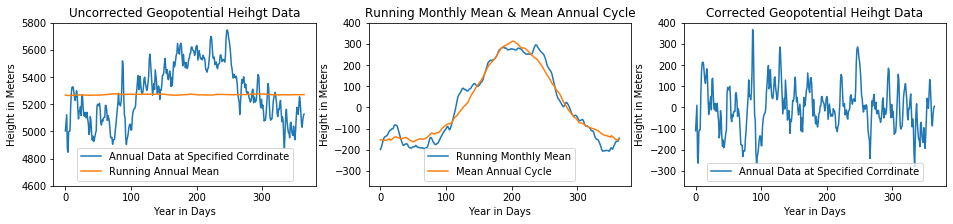

In [12]:
plt.figure(figsize=(16,3))
plt.subplot(131)
plt.plot(data_eu[int(5114-2*N):int(5114-N),0],label='Annual Data at Specified Corrdinate')
plt.plot(run_an_mean[int(5114-2*N):int(5114-N),0], label='Running Annual Mean')
plt.ylim(4600,5800)
plt.xlabel('Year in Days')
plt.ylabel('Height in Meters')
plt.legend(loc='lower center')
plt.title('Uncorrected Geopotential Heihgt Data')
plt.subplot(132)
plt.plot(run_mon_mean_alt[int(5114-2*N):int(5114-N),0],label='Running Monthly Mean')
plt.plot(mean_an_cycle[:,0], label='Mean Annual Cycle')
plt.ylim(-370,400)
plt.xlabel('Year in Days')
plt.ylabel('Height in Meters')
plt.legend(loc='lower center')
plt.title('Running Monthly Mean & Mean Annual Cycle')
plt.subplot(133)
plt.plot(data_eu[int(5114-2*N):int(5114-N),0]-mean_an_cycle[:,0]-run_an_mean[int(5114-2*N):int(5114-N),0],label='Annual Data at Specified Corrdinate')
plt.ylim(-370,400)
plt.xlabel('Year in Days')
plt.ylabel('Height in Meters')
plt.legend(loc='lower center')
plt.title('Corrected Geopotential Heihgt Data')
#plt.savefig("Annualcycle_remove.pdf",bbox_inches="tight",pad_inches=0.05)
plt.show()

In [13]:
run_an_mean[int(liste[6]):int(liste[7]),0].shape
#mean_an_cycle_whole = np.array((5114,936))
mean_an_cycle_whole = np.concatenate((mean_an_cycle[:,0],mean_an_cycle[:,0],mean_an_cycle[:,0],mean_an_cycle[:,0],[mean_an_cycle[364,0]],mean_an_cycle[:,0],mean_an_cycle[:,0],mean_an_cycle[:,0],[mean_an_cycle[364,0]],mean_an_cycle[:,0],mean_an_cycle[:,0],mean_an_cycle[:,0],mean_an_cycle[:,0],[mean_an_cycle[364,0]],mean_an_cycle[:,0],mean_an_cycle[:,0],mean_an_cycle[:,0],[mean_an_cycle[364,0]]))
print(mean_an_cycle_whole.shape)
for i in range(1,936,1):
    concat = np.concatenate((mean_an_cycle[:,i],mean_an_cycle[:,i],mean_an_cycle[:,i],mean_an_cycle[:,i],[mean_an_cycle[364,i]],mean_an_cycle[:,i],mean_an_cycle[:,i],mean_an_cycle[:,i],[mean_an_cycle[364,i]],mean_an_cycle[:,i],mean_an_cycle[:,i],mean_an_cycle[:,i],mean_an_cycle[:,i],[mean_an_cycle[364,i]],mean_an_cycle[:,i],mean_an_cycle[:,i],mean_an_cycle[:,i],[mean_an_cycle[364,i]]))
    mean_an_cycle_whole = np.vstack((mean_an_cycle_whole,concat))

    
    
print(mean_an_cycle_whole.shape)
#print(mean_an_cycle_whole)
mean_an_cycle_whole = mean_an_cycle_whole.T
print(mean_an_cycle_whole.shape)

(5114,)
(936, 5114)
(5114, 936)


In [ ]:
liste = np.array((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14))
liste = liste * (5114/14)
data_eu_cor = np.zeros((5114,936))
for i in range(936):
    for t in range(len(liste)-1):
        x = data_eu[int(liste[t]):int(liste[t+1]),i]-mean_an_cycle[:,i]-run_an_mean[int(liste[t]):int(liste[t+1]),i]
        print(x.shape)
        #data_eu_cor[int(liste[t]),i] = data_eu[int(liste[t]):int(liste[t+1]),i]-mean_an_cycle[:,i]-run_an_mean[int(liste[t]):int(liste[t+1]),i]

In [14]:
print(data_eu.shape)
print(mean_an_cycle_whole.shape)
print(run_an_mean.shape)
data_eu_cor = data_eu - mean_an_cycle_whole - run_an_mean
print(data_eu_cor.shape)

(5114, 936)
(5114, 936)
(5114, 936)
(5114, 936)


In [15]:
print(data_eu_cor.shape)
np.savetxt('std_datamatrix_europe_cor.txt', data_eu_cor, delimiter = ',')

(5114, 936)


In [5]:
data_eu_cor = np.loadtxt(open("std_datamatrix_europe_cor.txt","rb"),delimiter=",",skiprows=0)
print(data_eu_cor.shape)

(5114, 936)


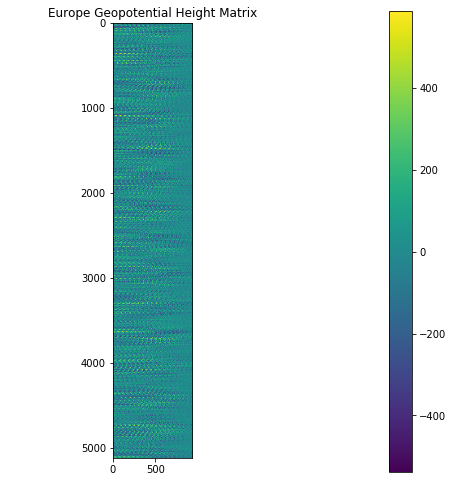

In [6]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)
ax1.set_title('Europe Geopotential Height Matrix')
plt.imshow(data_eu_cor[:,:])
ax1.set_aspect('equal')

cax = fig.add_axes([0.26, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

# Europe DATA Matrix

In [56]:
dataset = xr.open_dataset("hgt.1996.nc").hgt
timeframe = dataset[0,5,4:24,48:96]
print(timeframe.shape)

(20, 48)


In [61]:
dataset = xr.open_dataset("hgt.1996.nc").hgt
timeframe = dataset[0,5,4:24,48:96]
datamatrix = np.reshape(timeframe, (1, 960))
time = xr.open_dataset("hgt.1996.nc").time
for l in range(1,len(time)):
    timeframe = dataset[l,5,4:24,48:96]
    #print(timeframe.shape)
    onedim = np.reshape(timeframe, (1, 960))
    datamatrix = np.vstack((datamatrix,onedim))

In [62]:
for j in range(1,14):
    dataset = xr.open_dataset("hgt."+str(1996+j)+".nc").hgt
    time_neu = xr.open_dataset("hgt."+str(1996+j)+".nc").time
    for i in range(len(time_neu)):
        timeframe = dataset[i,5,4:24,48:96]
        #print(timeframe.shape)
        onedim = np.reshape(timeframe, (1, 960))
        datamatrix = np.vstack((datamatrix,onedim))
        #print(onedim)

In [63]:
print(datamatrix.shape)
np.savetxt('datamatrix_europe.txt', datamatrix, delimiter = ',')

(5114, 960)


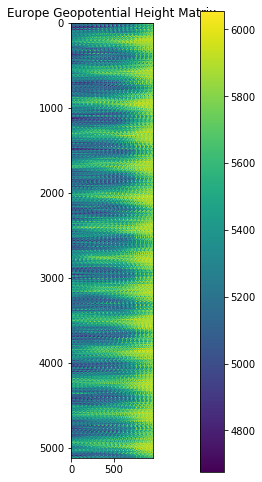

In [64]:
fig = plt.figure(figsize=(3, 8))

ax1 = fig.add_subplot(111)
ax1.set_title('Europe Geopotential Height Matrix')
plt.imshow(datamatrix[:,:])
ax1.set_aspect('equal')

cax = fig.add_axes([0.26, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

[[4902. 4913. 4925. ... 5900. 5875. 5844.]
 [4997. 5004. 5011. ... 5868. 5847. 5823.]
 [4982. 4985. 4990. ... 5840. 5829. 5814.]
 ...
 [5318. 5326. 5334. ... 5701. 5678. 5654.]
 [5341. 5340. 5339. ... 5780. 5769. 5755.]
 [5355. 5354. 5352. ... 5814. 5811. 5801.]]
(5114, 960)
4925.0


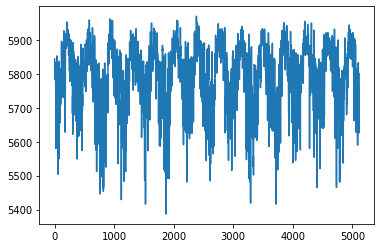

In [65]:
#datamatrix_europe = datamatrix
#print(datamatrix_europe.shape)
#print(datamatrix_europe)
#datamatrix_save = np.loadtxt(open("datamatrix_europe.txt","rb"),delimiter=",",skiprows=0)
print(datamatrix_save)
print(datamatrix_save.shape)
print(datamatrix_save[0,2])
plt.plot(datamatrix_save[:,959])
plt.show()

# Large DATA Matrix

In [19]:
dataset = xr.open_dataset("hgt.1948.nc").hgt
timeframe = dataset[0,5,:,:]
datamatrix = np.reshape(timeframe, (1, 10512))
time = xr.open_dataset("hgt."+str(1948+j)+".nc").time
for l in range(1,len(time)):
    timeframe = dataset[l,5,:,:]
    #print(timeframe.shape)
    onedim = np.reshape(timeframe, (1, 10512))
    datamatrix = np.vstack((datamatrix,onedim))

for j in range(1,72):
    dataset = xr.open_dataset("hgt."+str(1948+j)+".nc").hgt
    time = xr.open_dataset("hgt."+str(1948+j)+".nc").time
    for i in range(len(time)):
        timeframe = dataset[i,5,:,:]
        #print(timeframe.shape)
        onedim = np.reshape(timeframe, (1, 10512))
        datamatrix = np.vstack((datamatrix,onedim))
        #print(onedim)

In [21]:
np.savetxt('datamatrix.txt', datamatrix, delimiter = ',')
# my_matrix = numpy.loadtxt(open("matrix.txt","rb"),delimiter=",",skiprows=0)

In [22]:
datamatrix.shape

(26297, 10512)

In [26]:
datamatrix[0:3,:]

array([[4954., 4954., 4954., ..., 5137., 5137., 5137.],
       [4968., 4968., 4968., ..., 5141., 5141., 5141.],
       [4995., 4995., 4995., ..., 5155., 5155., 5155.]], dtype=float32)

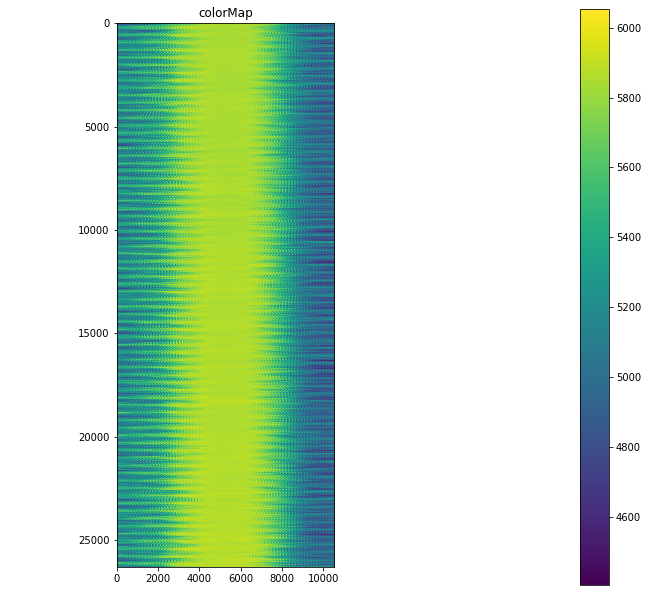

In [35]:
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(111)
ax1.set_title('colorMap')
plt.imshow(datamatrix[:,:])
ax1.set_aspect('equal')

cax = fig.add_axes([0.26, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [8]:
import sklearn
from sklearn.decomposition import PCA
import numpy as np
rng = np.random.default_rng()
import matplotlib.pyplot as plt
from numpy import *

# Inverse PCA

In [212]:
dataset = xr.open_dataset("hgt.1948.nc").hgt
timeframe = dataset[0,5,8:26, 40:92]
timeframe = timeframe[::-1, :]
mean = np.mean(timeframe)
print(mean)
timeframe = timeframe - mean
mypca = PCA(n_components=2)
mypca.fit(timeframe)
trunc_data_inPCspace = mypca.transform(timeframe)
print(mypca.explained_variance_ratio_)

<xarray.DataArray 'hgt' ()>
array(5336.24, dtype=float32)
Coordinates:
    level    float32 500.0
    time     datetime64[ns] 1948-01-01
[0.96293163 0.0291227 ]


In [202]:
print(trunc_data_inPCspace.shape)
trunc_data = mypca.inverse_transform(trunc_data_inPCspace)
trunc_data_wm_1PC = trunc_data + 5336.24
print(trunc_data.shape)

(18, 1)
(18, 52)


In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(131)
level = 5
time = 0
d = Dataset("hgt.1948.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
#cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.title('Raw Data 500 hPa Geopotential Height')
#######
plt.subplot(132)
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(trunc_data_wm_1PC, aspect='auto', vmin=5100, vmax=5800)
#cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.title('Restored Data from First PC Projection')
#######
plt.subplot(133)
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(trunc_data_wm_2PC, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.title('Restored Data from First 2 PCs')
plt.savefig("PCAvsNOPCA.pdf",bbox_inches="tight",pad_inches=0.05)
plt.show()

# standardization

In [318]:
sigma_eu = std(datamatrix_europe)
mean_eu = mean(datamatrix_europe)
data_eu_norm = (datamatrix_europe - mean_eu) / sigma_eu

In [9]:
sigma_eu = std(data_eu_cor)
data_eu_norm = data_eu_cor / sigma_eu

# PCA

In [90]:
mypca = PCA(n_components=12)

In [91]:
mypca.fit(data_eu_norm)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [92]:
p_samples = mypca.transform(data_eu_norm)

In [93]:
print(p_samples.shape)

(5114, 12)


In [17]:
#p_samples_save = mypca.transform(data_eu_norm)

In [14]:
#explained_var_save = mypca.explained_variance_ratio_

C:\Users\Ferdinand\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


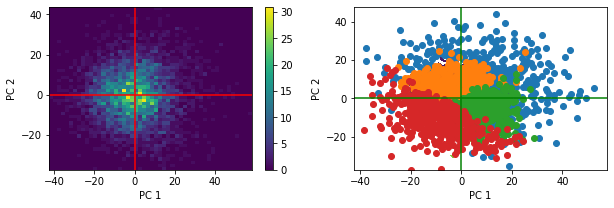

In [89]:
plt.figure(figsize=(10,3))
#plt.subplot(131)
#plt.bar(range(1, 51), explained_var_save, alpha=0.5, align='center',label='Explained Variance Ratio per PC')
#plt.step(range(1, 51), np.cumsum(explained_var_save), where='mid',label='Cumulative Explained Variance Ratios')
#plt.ylabel('Explained Variance Ratio')
#plt.xlabel('Principal components')
#plt.legend(loc='right', prop={'size': 9})
plt.subplot(121)
plt.hist2d(p_samples_save[:,0],p_samples_save[:,1],bins=50)
plt.colorbar()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axhline(y=0, color = 'red')
plt.axvline(x=0, color = 'red')
#plt.title('2D Histogramm of Reduced Data Set \n for Two Principal Components')
plt.subplot(122)
plt.contourf(x[:-1], y[:-1], -np.log(h.T))
for msset in iHMM.metastable_sets:
    plt.plot(cl.clustercenters[msset,0], cl.clustercenters[msset,1],' o')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axhline(y=0, color = 'green')
plt.axvline(x=0, color = 'green')


plt.savefig("PCAandclusterresult_2PCs_neu.png",bbox_inches="tight",pad_inches=0.05)
plt.show()

[0.16695689 0.14312081 0.12167245 0.0855298  0.06772199 0.05425718
 0.05009936 0.03804001 0.03170916 0.02961465 0.02650304 0.02042864]
(12, 936)


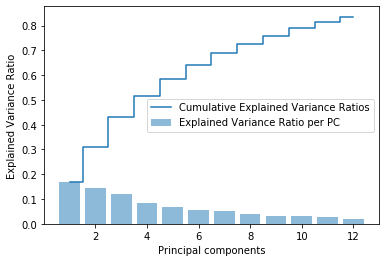

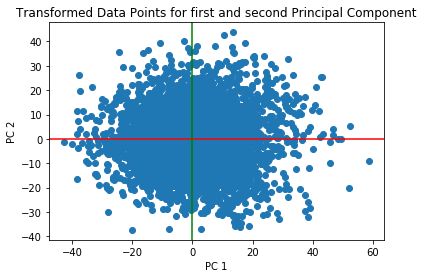

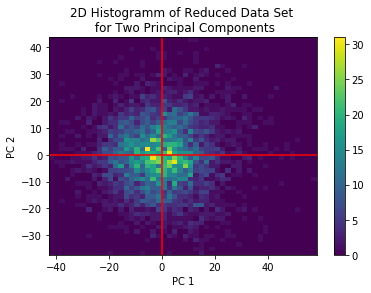

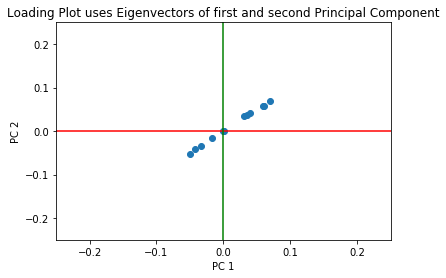

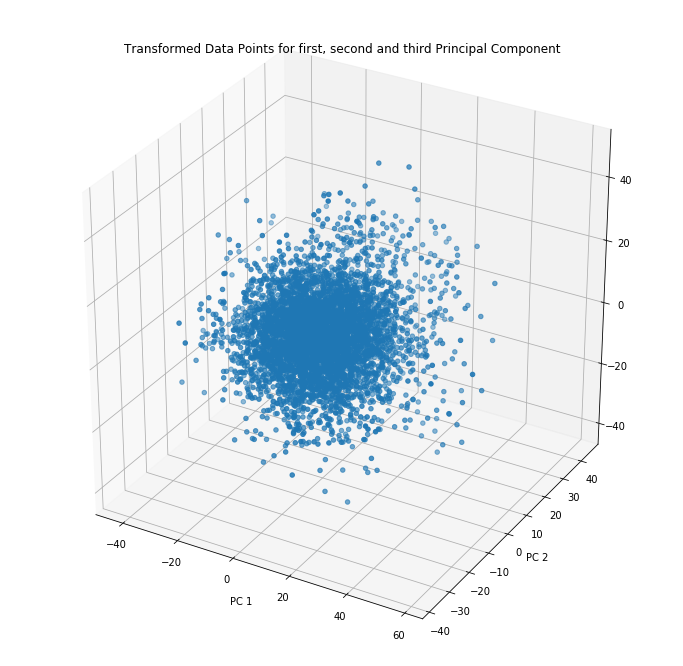

In [225]:
print(mypca.explained_variance_ratio_)

print(mypca.components_.shape)

plt.bar(range(1, 13), mypca.explained_variance_ratio_, alpha=0.5, align='center',label='Explained Variance Ratio per PC')
plt.step(range(1, 13), np.cumsum(mypca.explained_variance_ratio_), where='mid',label='Cumulative Explained Variance Ratios')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal components')
plt.legend(loc='right')
plt.savefig("Explained_Variance.pdf",bbox_inches="tight",pad_inches=0.05)
plt.show()

plt.scatter(p_samples[:, 0], p_samples[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axhline(y=0, color = 'red')
plt.axvline(x=0, color = 'green')
plt.title('Transformed Data Points for first and second Principal Component')
plt.show()

plt.hist2d(p_samples[:,0],p_samples[:,1],bins=50)
plt.colorbar()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axhline(y=0, color = 'red')
plt.axvline(x=0, color = 'red')
plt.title('2D Histogramm of Reduced Data Set \n for Two Principal Components')
plt.savefig("1and2PC_hist2d.png",bbox_inches="tight",pad_inches=0.05)
plt.show()

eigvecs = mypca.components_
fig, ax = plt.subplots()
ax.scatter(eigvecs[:,0], eigvecs[:,1])   
plt.xlim(-0.25,0.25)
plt.ylim(-0.25,0.25)
plt.axhline(y=0, color = 'red')
plt.axvline(x=0, color = 'green')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Loading Plot uses Eigenvectors of first and second Principal Component')
plt.show

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
ax.scatter3D(p_samples[:,0],p_samples[:,1],p_samples[:,2])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.zlabel('PC 3')
plt.title('Transformed Data Points for first, second and third Principal Component')
plt.draw()
plt.show()

## Start the hidden Markov chain modell for the PCA reduced data

In [24]:
import pyemma

In [94]:
data = p_samples
print(data)
print(data.shape)

[[  3.1623365   -4.6586382  -15.42103322 ...   7.47098982   0.23593121
    1.5316389 ]
 [  7.92861321  -3.33565664 -11.34688695 ...   1.71854965   0.76334175
    6.95096867]
 [ 19.26367256  -5.30967097  -9.41451514 ...  -4.75479776  -5.71153609
    3.25540877]
 ...
 [ 13.33209635   8.72436682  -4.24671834 ...  -2.02710288   0.38643617
    8.73286386]
 [ 14.57156165   9.67344308  -5.32099575 ...  -2.3200627   -3.33913449
    8.09061364]
 [ 17.20643037  11.40315419  -0.05123162 ...  -4.38974786  -7.85460905
    4.42183734]]
(5114, 12)


In [53]:
h, (x,y) = np.histogramdd(data,bins=100)

C:\Users\Ferdinand\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


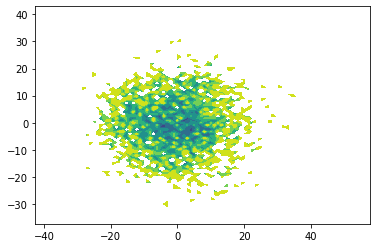

In [54]:
plt.contourf(x[:-1], y[:-1], -np.log(h.T))

In [95]:
cls = [pyemma.coordinates.cluster_regspace(data, dmin=ii) for ii in [2, 1.5,1]]

27-07-20 14:07:04 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[70] WARNING  Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
27-07-20 14:07:04 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[70] INFO     Presumably finished estimation. Message: Used data for centers: 100.00%
27-07-20 14:07:05 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[72] WARNING  Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
27-07-20 14:07:05 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[72] INFO     Presumably finished estimation. Message: Used data for centers: 100.00%
27-07-20 14:07:05 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[74] WARNING  Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
27-07-20 14:07:05 pyemma.coordinates.

C:\Users\Ferdinand\anaconda3\lib\site-packages\pyemma\coordinates\clustering\regspace.py:153: UserWarning: Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
  warnings.warn(msg)
C:\Users\Ferdinand\anaconda3\lib\site-packages\pyemma\coordinates\clustering\regspace.py:153: UserWarning: Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
  warnings.warn(msg)
C:\Users\Ferdinand\anaconda3\lib\site-packages\pyemma\coordinates\clustering\regspace.py:153: UserWarning: Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
  warnings.warn(msg)


C:\Users\Ferdinand\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ferdinand\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ferdinand\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


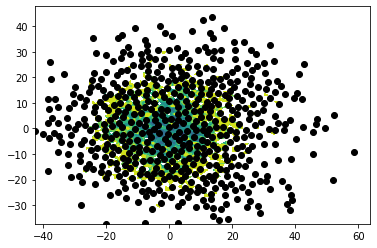

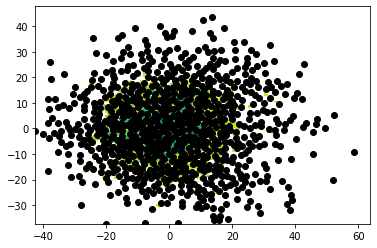

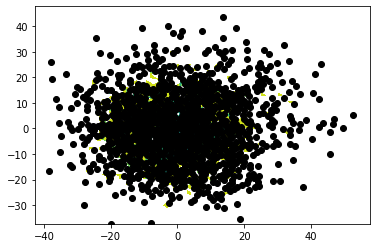

In [56]:
for cl in cls:
    plt.figure()
    plt.contourf(x[:-1], y[:-1], -np.log(h.T))
    plt.plot(cl.clustercenters[:,0], cl.clustercenters[:,1],' ok')

In [112]:
its = [pyemma.msm.timescales_msm(cl.dtrajs, lags=[1,2,3,5,6,7,8,9], reversible=True) for cl in cls]

27-07-20 15:15:27 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[83] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs
27-07-20 15:15:27 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[72] WARNING  Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
27-07-20 15:15:27 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[72] INFO     Presumably finished estimation. Message: Used data for centers: 100.00%


C:\Users\Ferdinand\anaconda3\lib\site-packages\pyemma\coordinates\clustering\regspace.py:153: UserWarning: Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
  warnings.warn(msg)


27-07-20 15:15:30 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[92] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


27-07-20 15:15:33 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[101] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


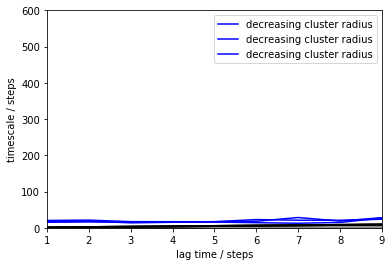

In [58]:
plt.figure()
for iits in its:
    pyemma.plots.plot_implied_timescales(iits, ylog=False, nits=1, ax=plt.gca(), label='decreasing cluster radius')
plt.legend()
plt.ylim([0,600])
plt.show()

In [115]:
icl = cls[-1] # Start with the finer discretization, which was the last one
#lags=[1,2,3,5,6,7,8,9]
hits = pyemma.msm.timescales_hmsm(icl.dtrajs, 4, lags=[1,2,3,5,6,7,8,9], reversible=True)

(0, 600)

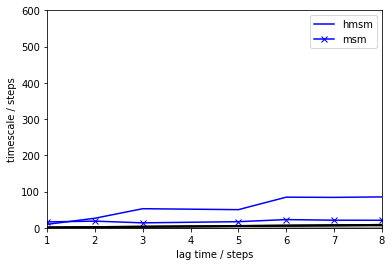

In [60]:
plt.figure()
pyemma.plots.plot_implied_timescales(hits, ylog=False, nits=1, ax=plt.gca(), label='hmsm')
pyemma.plots.plot_implied_timescales(its[-1], ylog=False, nits=1, marker='x', ax=plt.gca(), label='msm')
plt.legend()
plt.xlim([1,8])
plt.ylim([0,600])

In [78]:
iHMM = hits.models[0]

In [79]:
## show the metastable sets:
iHMM.metastable_sets

[array([  2,   3,   4,   5,   6,   7,  30,  31,  32,  33,  34,  35,  36,
         42,  46,  56,  58,  59,  60,  61,  62,  63,  64,  65,  74,  80,
         81,  82,  83,  84,  85,  86,  87,  88,  89,  90, 101, 103, 115,
        116, 117, 118, 121, 122, 123, 124, 125, 126, 127, 128, 223, 242,
        243, 244, 245, 248, 265, 266, 267, 268, 284, 285, 286, 288, 289,
        290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 312, 313, 314,
        315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 336, 344, 345,
        346, 347, 348, 349, 364, 365, 366, 367, 368, 369, 370, 371, 372,
        373, 374, 375, 376, 377, 393, 395, 396, 398, 416, 428, 436, 437,
        438, 439, 440, 441, 443, 444, 445, 446, 447, 448, 481, 482, 483,
        484, 485, 486, 487, 488, 491, 503, 549, 555, 556, 560, 564, 606,
        607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619,
        620, 621, 622, 623, 624, 625, 626, 628, 631, 647, 660, 666, 667,
        677, 678, 702, 704, 706, 712, 721, 722, 723

## Show multiple plots for the different found metastable atmospheric regimes:
## -> it indeed found different configurations for the atmospheric patterns

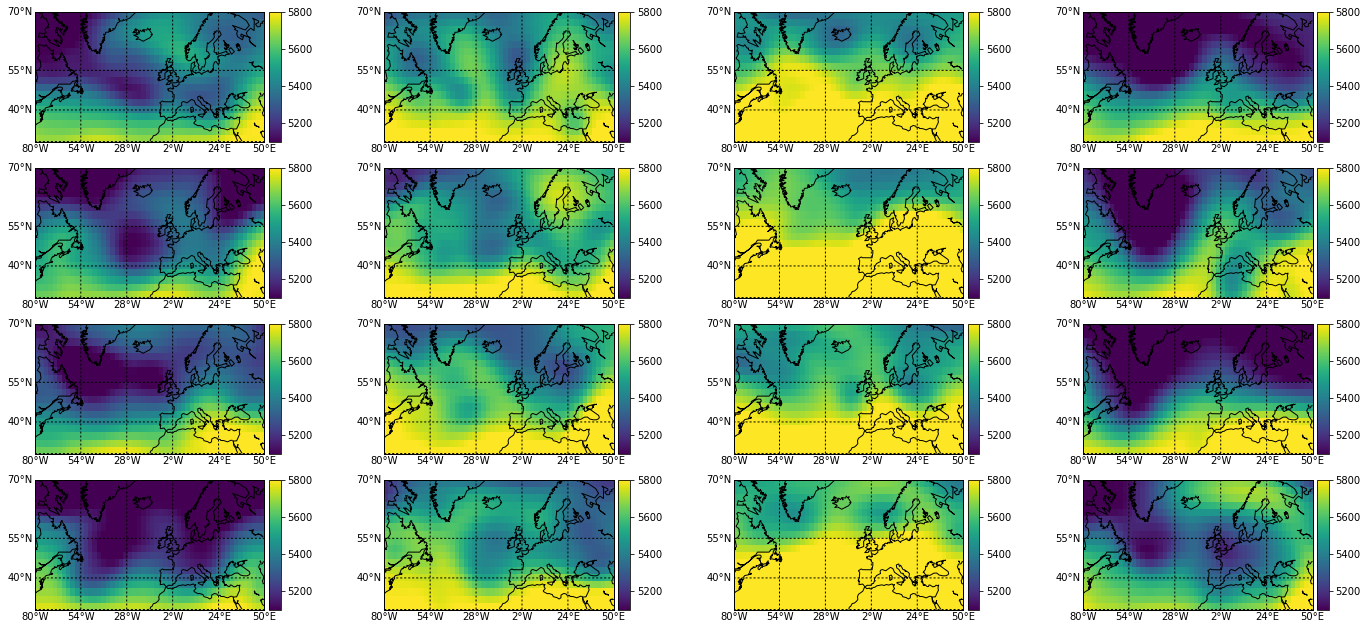

In [85]:
plt.figure(figsize=(24,11))
#############
plt.subplot(441)  
level = 5
time = 4
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)

cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(442)  
level = 5
time = 123
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(443)  
level = 5
time = 243
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(444)  
level = 5
time = 346
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
###########
plt.subplot(445)  
level = 5
time = 10
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(446)  
level = 5
time = 131
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(447)  
level = 5
time = 215
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(448)  
level = 5
time = 353
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
############
plt.subplot(449)  
level = 5
time = 19
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(4,4,10)  
level = 5
time = 144
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(4,4,11)  
level = 5
time = 252
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(4,4,12)  
level = 5
time = 339
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
###########
plt.subplot(4,4,13)  
level = 5
time = 39
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(4,4,14)  
level = 5
time = 137
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(4,4,15)  
level = 5
time = 231
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(4,4,16)  
level = 5
time = 359
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
############
plt.savefig("classification_check_2PCs.pdf",bbox_inches="tight",pad_inches=0.05)
plt.show()

C:\Users\Ferdinand\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


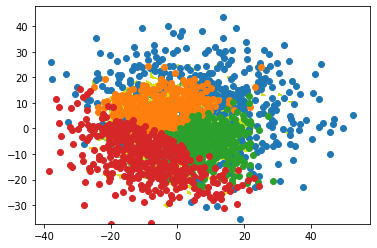

In [63]:

plt.contourf(x[:-1], y[:-1], -np.log(h.T))
for msset in iHMM.metastable_sets:
    plt.plot(cl.clustercenters[msset,0], cl.clustercenters[msset,1],' o')


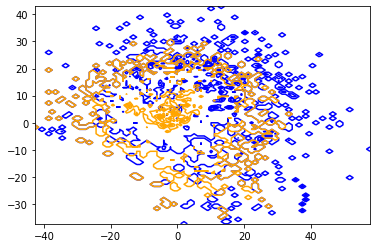

In [69]:
# Histogram the dataset using the metastable distributions as weights
for msdisto, col in zip(iHMM.metastable_distributions, ['b','orange']):
    weights = msdisto[iHMM.dtrajs_full[0]]
    weights /= weights.sum()
    h, (x,y) = np.histogramdd(data,bins=100, weights=weights)
    plt.contour(x[:-1], y[:-1], h.T, colors=[col])

In [103]:
iHMM_neu = hits.models[:]
iHMM_neu[7]

MaximumLikelihoodHMSM(accuracy=0.001, connectivity=None, dt_traj='1 step',
           lag=9, maxit=1000, mincount_connectivity=0.25,
           msm_init='largest-strong', nstates=4, observe_nonempty=True,
           reversible=True, separate=None, stationary=False, stride=1)

In [238]:
# TRANSITION MATRIX for metastable regimes changes (probabilities to go from one state to another)
transmatrix = iHMM_neu[0].transition_matrix

## Eigenvalue analysis of the transition matrix 
### -> compare analysis to paper of "multiple flow equilibria in atmos...."

In [239]:
eigenvalues_lag_0neu = np.linalg.eig(transmatrix)[0]
print(eigenvalues_lag_0neu)

[1.         0.90056792 0.86054723 0.82006103]


0.9999999999999994


C:\Users\Ferdinand\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Ferdinand\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide


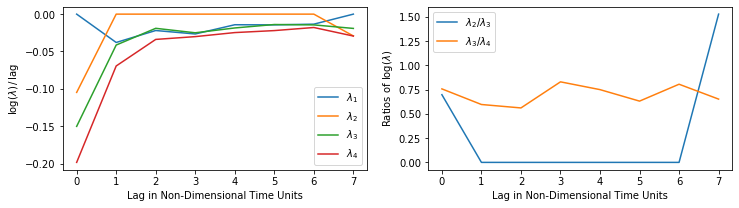

In [76]:
eigenval=[]
iHMM = hits.models[:]
for i in range(8):
    eigenvalues = np.linalg.eig(iHMM[i].transition_matrix)[0]
    eigenval.append(eigenvalues)
print(eigenval[0][0])
lambdas_1 = []
lambdas_2 = []
lambdas_3 = []
lambdas_4 = []
for j in range(8):
    lambdas = 1/(j+1)*np.log(np.abs(eigenval[j][0]))
    lambdas_1.append(lambdas)
for k in range(8):
    lambdas = 1/(k+1)*np.log(np.abs(eigenval[k][1]))
    lambdas_2.append(lambdas)
for l in range(8):
    lambdas = 1/(l+1)*np.log(np.abs(eigenval[l][2]))
    lambdas_3.append(lambdas)
for n in range(8):
    lambdas = 1/(n+1)*np.log(np.abs(eigenval[n][3]))
    lambdas_4.append(lambdas)

plt.figure(figsize=(12,3))
plt.subplot(121)    
plt.plot(lambdas_1,label=r'$\lambda_1$')
plt.plot(lambdas_2,label=r'$\lambda_2$')
plt.plot(lambdas_3,label=r'$\lambda_3$')
plt.plot(lambdas_4,label=r'$\lambda_4$')
plt.legend()
plt.xlabel('Lag in Non-Dimensional Time Units')
plt.ylabel(r'log($\lambda$)$\,$/$\,$lag')


plt.subplot(122)
lambdas_1_ar = np.asarray(lambdas_1)
lambdas_2_ar = np.asarray(lambdas_2)
lambdas_3_ar = np.asarray(lambdas_3)
lambdas_4_ar = np.asarray(lambdas_4)
ratio_12 = lambdas_1_ar/lambdas_2_ar
ratio_23 = lambdas_2_ar/lambdas_3_ar
ratio_34 = lambdas_3_ar/lambdas_4_ar
ratio_41 = lambdas_4_ar/lambdas_1_ar
#plt.plot(ratio_12,label=r'$\lambda_1 / \lambda_2$')
plt.plot(ratio_23,label=r'$\lambda_2 / \lambda_3$')
plt.plot(ratio_34,label=r'$\lambda_3 / \lambda_4$')
#plt.plot(ratio_41,label=r'$\lambda_4 / \lambda_1$')
plt.xlabel('Lag in Non-Dimensional Time Units')
plt.ylabel(r'Ratios of log($\lambda$)')
plt.legend()
plt.savefig("log_eigenvalues_and_ratios_at2PC4hidden.pdf",bbox_inches="tight",pad_inches=0.05)
plt.show()

-0.7562736197401568


C:\Users\Ferdinand\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide


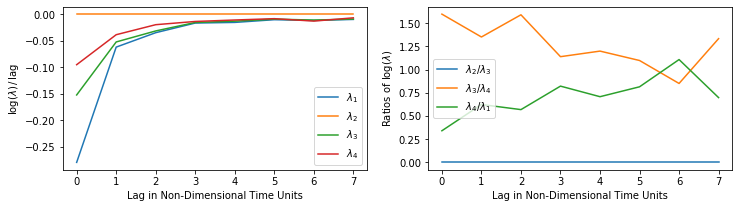

In [47]:
eigenval=[]
iHMM = hits.models[:]
for i in range(8):
    eigenvalues = np.linalg.eig(iHMM[i].transition_matrix)[0]
    eigenval.append(eigenvalues)
print(eigenval[0][0])
lambdas_1 = []
lambdas_2 = []
lambdas_3 = []
lambdas_4 = []
for j in range(8):
    lambdas = 1/(j+1)*np.log(np.abs(eigenval[j][0]))
    lambdas_1.append(lambdas)
for k in range(8):
    lambdas = 1/(k+1)*np.log(np.abs(eigenval[k][1]))
    lambdas_2.append(lambdas)
for l in range(8):
    lambdas = 1/(l+1)*np.log(np.abs(eigenval[l][2]))
    lambdas_3.append(lambdas)
for n in range(8):
    lambdas = 1/(n+1)*np.log(np.abs(eigenval[n][3]))
    lambdas_4.append(lambdas)

plt.figure(figsize=(12,3))
plt.subplot(121)    
plt.plot(lambdas_1,label=r'$\lambda_1$')
plt.plot(lambdas_2,label=r'$\lambda_2$')
plt.plot(lambdas_3,label=r'$\lambda_3$')
plt.plot(lambdas_4,label=r'$\lambda_4$')
plt.legend()
plt.xlabel('Lag in Non-Dimensional Time Units')
plt.ylabel(r'log($\lambda$)$\,$/$\,$lag')


plt.subplot(122)
lambdas_1_ar = np.asarray(lambdas_1)
lambdas_2_ar = np.asarray(lambdas_2)
lambdas_3_ar = np.asarray(lambdas_3)
lambdas_4_ar = np.asarray(lambdas_4)
ratio_12 = lambdas_1_ar/lambdas_2_ar
ratio_23 = lambdas_2_ar/lambdas_3_ar
ratio_34 = lambdas_3_ar/lambdas_4_ar
ratio_41 = lambdas_4_ar/lambdas_1_ar
#plt.plot(ratio_12,label=r'$\lambda_1 / \lambda_2$')
plt.plot(ratio_23,label=r'$\lambda_2 / \lambda_3$')
plt.plot(ratio_34,label=r'$\lambda_3 / \lambda_4$')
plt.plot(ratio_41,label=r'$\lambda_4 / \lambda_1$')
plt.xlabel('Lag in Non-Dimensional Time Units')
plt.ylabel(r'Ratios of log($\lambda$)')
plt.legend()
plt.savefig("log_eigenvalues_and_ratios_at12PC4hidden.pdf",bbox_inches="tight",pad_inches=0.05)
plt.show()

[array([1.        , 0.90912377, 0.85873198, 0.75627362]), array([1.        , 0.92538572, 0.90046215, 0.88315367]), array([1.        , 0.94205292, 0.90937397, 0.90042777]), array([1.        , 0.94626938, 0.93899087, 0.93504511]), array([1.        , 0.94623187, 0.93583402, 0.92493596]), array([1.        , 0.95001749, 0.94522637, 0.93902114]), array([1.        , 0.92469888, 0.92038336, 0.91211964]), array([1.        , 0.94583605, 0.92839131, 0.9233641 ])]


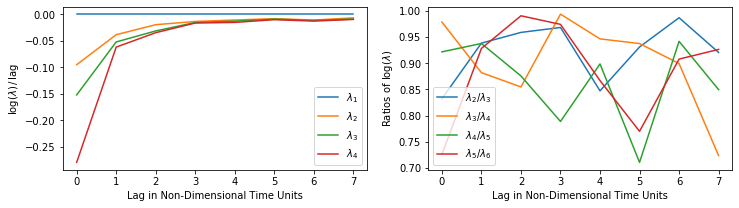

In [116]:
eigenval=[]
iHMM = hits.models[:]
for i in range(8):
    eigenvalues = np.linalg.eig(iHMM[i].transition_matrix)[0]
    eigenval.append(eigenvalues)
for r in range(8):
    eigenval[r] = np.sort(np.abs(eigenval[r]))[::-1]
print(eigenval)
lambdas_1 = []
lambdas_2 = []
lambdas_3 = []
lambdas_4 = []
#lambdas_5 = []
#lambdas_6 = []
#lambdas_7 = []
#lambdas_8 = []
for j in range(8):
    lambdas = 1/(j+1)*np.log(np.abs(eigenval[j][0]))
    lambdas_1.append(lambdas)
for k in range(8):
    lambdas = 1/(k+1)*np.log(np.abs(eigenval[k][1]))
    lambdas_2.append(lambdas)
for l in range(8):
    lambdas = 1/(l+1)*np.log(np.abs(eigenval[l][2]))
    lambdas_3.append(lambdas)
for n in range(8):
    lambdas = 1/(n+1)*np.log(np.abs(eigenval[n][3]))
    lambdas_4.append(lambdas)
#for m in range(8):
#    lambdas = 1/(m+1)*np.log(np.abs(eigenval[m][4]))
#    lambdas_5.append(lambdas)
#for o in range(8):
#    lambdas = 1/(o+1)*np.log(np.abs(eigenval[o][5]))
#    lambdas_6.append(lambdas)
#for d in range(8):
#    lambdas = 1/(d+1)*np.log(np.abs(eigenval[d][6]))
#    lambdas_7.append(lambdas)
#for e in range(8):
#    lambdas = 1/(e+1)*np.log(np.abs(eigenval[e][7]))
#    lambdas_8.append(lambdas)

plt.figure(figsize=(12,3))
plt.subplot(121)    
plt.plot(lambdas_1,label=r'$\lambda_1$')
plt.plot(lambdas_2,label=r'$\lambda_2$')
plt.plot(lambdas_3,label=r'$\lambda_3$')
plt.plot(lambdas_4,label=r'$\lambda_4$')
#plt.plot(lambdas_5,label=r'$\lambda_5$')
#plt.plot(lambdas_6,label=r'$\lambda_6$')
#plt.plot(lambdas_7,label=r'$\lambda_5$')
#plt.plot(lambdas_8,label=r'$\lambda_6$')
plt.legend()
plt.xlabel('Lag in Non-Dimensional Time Units')
plt.ylabel(r'log($\lambda$)$\,$/$\,$lag')


plt.subplot(122)
#lambdas_1_ar = np.asarray(lambdas_1)
#lambdas_2_ar = np.asarray(lambdas_2)
#lambdas_3_ar = np.asarray(lambdas_3)
#lambdas_4_ar = np.asarray(lambdas_4)
#lambdas_5_ar = np.asarray(lambdas_5)
#lambdas_6_ar = np.asarray(lambdas_6)
#lambdas_7_ar = np.asarray(lambdas_7)
#lambdas_8_ar = np.asarray(lambdas_8)
#ratio_12 = lambdas_1_ar/lambdas_2_ar
#ratio_23 = lambdas_2_ar/lambdas_3_ar
#ratio_34 = lambdas_3_ar/lambdas_4_ar
#ratio_45 = lambdas_4_ar/lambdas_5_ar
#ratio_56 = lambdas_5_ar/lambdas_6_ar
#ratio_67 = lambdas_6_ar/lambdas_7_ar
#ratio_78 = lambdas_7_ar/lambdas_8_ar
#plt.plot(ratio_12,label=r'$\lambda_1 / \lambda_2$')
plt.plot(ratio_23,label=r'$\lambda_2 / \lambda_3$')
plt.plot(ratio_34,label=r'$\lambda_3 / \lambda_4$')
plt.plot(ratio_45,label=r'$\lambda_4 / \lambda_5$')
plt.plot(ratio_56,label=r'$\lambda_5 / \lambda_6$')
#plt.plot(ratio_67,label=r'$\lambda_6 / \lambda_7$')
#plt.plot(ratio_78,label=r'$\lambda_7 / \lambda_8$')
plt.xlabel('Lag in Non-Dimensional Time Units')
plt.ylabel(r'Ratios of log($\lambda$)')
plt.legend()
plt.savefig("log_eigenvalues_and_ratios_at12PC6hidden.pdf",bbox_inches="tight",pad_inches=0.05)
plt.show()

#### playing around with the transition matrix

In [80]:
transmatrix=iHMM.transition_matrix

In [81]:
transmatrix

array([[0.90498885, 0.05613478, 0.02344166, 0.01543471],
       [0.02042506, 0.88536839, 0.05161993, 0.04258662],
       [0.01105336, 0.0668947 , 0.87600666, 0.04604528],
       [0.00571354, 0.04332601, 0.03614817, 0.91481228]])

In [82]:
 transmatrix[1,0]

0.020425063136920822

In [83]:
np.sum(transmatrix,axis=1)

array([1., 1., 1., 1.])

In [84]:
eigenvalues, eigenvectors = np.linalg.eig(transmatrix)
print(eigenvalues)
print(eigenvectors) ##nicht mehr ändern gilt für 2 PC 4 hidden

[1.         0.90056792 0.86054723 0.82006103]
[[-0.5        -0.9362627   0.52950297 -0.22742871]
 [-0.5        -0.05108678 -0.3651271   0.64893073]
 [-0.5         0.07552834 -0.5071977  -0.72603632]
 [-0.5         0.33926061  0.57363691 -0.00602913]]


In [74]:
#eigenvalues, eigenvectors = np.linalg.eig(transmatrix)
#print(eigenvalues)
#print(eigenvectors)##nicht mehr ändern gilt für 12PC 4hidden

[-0.75627362  1.          0.85873198  0.90912377]
[[-0.78438329  0.5         0.73386719  0.13789031]
 [ 0.62016791  0.5         0.66082443  0.17474104]
 [ 0.00753859  0.5        -0.03519494 -0.94741062]
 [-0.00881986  0.5        -0.15333407  0.22992381]]


In [91]:
#eigenvalues_lag_8, eigenvectors_lag_8 = np.linalg.eig(transmatrix)
print(eigenvalues_lag_8)
print(eigenvectors_lag_8)

[ 0.91042911  1.         -0.90408269 -0.88227994]
[[ 0.68351684 -0.5        -0.74171627 -0.00274001]
 [-0.26979029 -0.5        -0.00860141 -0.71619735]
 [-0.26975642 -0.5        -0.01072564  0.69788825]
 [ 0.62229366 -0.5         0.67057285  0.00241747]]


In [83]:
#eigenvalues_lag_9, eigenvectors_lag_9 = np.linalg.eig(transmatrix)
print(eigenvalues_lag_9)
print(eigenvectors_lag_9)

[ 1.          0.79179436 -0.85823983 -0.79095302]
[[-0.5        -0.61764831 -0.70691736  0.01319792]
 [-0.5        -0.62475636  0.70489923 -0.13955799]
 [-0.5         0.38084001 -0.0378512  -0.66974838]
 [-0.5         0.28835905  0.04418371  0.72923693]]


In [68]:
#eigenvalues_PC_2, eigenvectors_PC_2 = np.linalg.eig(transmatrix)
print(eigenvalues_PC_2)
print(eigenvectors_PC_2)

[1.         0.90056792 0.86054723 0.82006103]
[[-0.5        -0.9362627   0.52950297 -0.22742871]
 [-0.5        -0.05108678 -0.3651271   0.64893073]
 [-0.5         0.07552834 -0.5071977  -0.72603632]
 [-0.5         0.33926061  0.57363691 -0.00602913]]


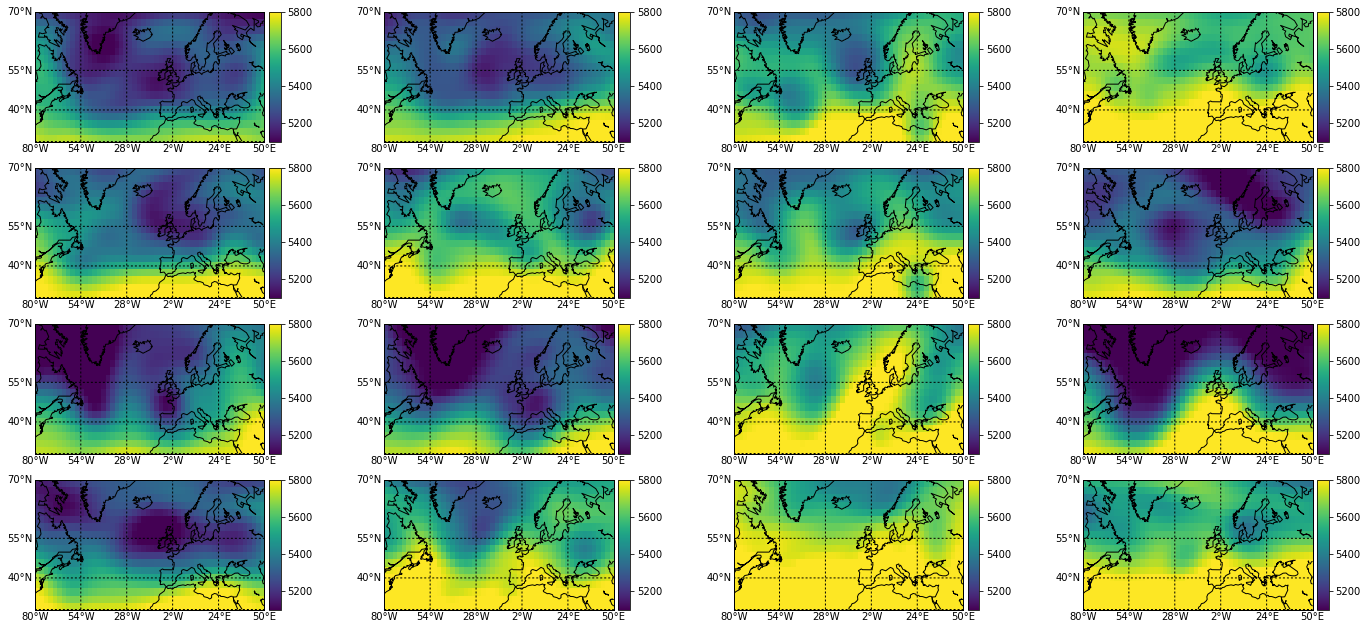

In [218]:
plt.figure(figsize=(24,11))
#############
plt.subplot(441)  
level = 5
time = 68
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)

cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(442)  
level = 5
time = 100
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(443)  
level = 5
time = 129
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(444)  
level = 5
time = 186
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
###########
plt.subplot(445)  
level = 5
time = 109
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(446)  
level = 5
time = 276
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(447)  
level = 5
time = 121
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(448)  
level = 5
time = 96
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
############
plt.subplot(449)  
level = 5
time = 2
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(4,4,10)  
level = 5
time = 14
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(4,4,11)  
level = 5
time = 156
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(4,4,12)  
level = 5
time = 340
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
###########
plt.subplot(4,4,13)  
level = 5
time = 105
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(4,4,14)  
level = 5
time = 151
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(4,4,15)  
level = 5
time = 207
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
plt.subplot(4,4,16)  
level = 5
time = 251
d = Dataset("hgt.1996.nc")
hgt = d.variables["hgt"][:][time, level, 8:26, 40:92]  # Not sure about the dims, here.
hgt = hgt[::-1, :]
lon = d.variables["lon"][40:92]
lat = d.variables["lat"][8:26]
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=50,resolution='c')
im = m.imshow(hgt, aspect='auto', vmin=5100, vmax=5800)
cb = m.colorbar(im, "right", size = "5%", pad = "2%")
m.drawcoastlines()
m.drawparallels(np.arange(25.,71.,15.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-80.,51.,26.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary()
############
plt.savefig("classification_check.pdf",bbox_inches="tight",pad_inches=0.05)
plt.show()